In [2]:
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
import cv2 as cv
import numpy as np
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [14]:
def FrameSplitter (VidName,PicName):
  # Using cv2, capturing frames from the slow-motion video of dripping honey into hot water.
  videoFile = cv.VideoCapture(VidName)   # pass the video that will be seperated into it's frames             
  taken, img = videoFile.read()               
  img = cv.flip(img,0)                        # We needed to flip the frames in order to get proper view.                                                  
  count = 0
  while taken:
    str_name = PicName + str(count)       # name of the frames are also provided and extracted in ascending order. 
    cv.imwrite(str_name+".jpg", img)   
    taken,img = videoFile.read()
    img = cv.flip(img,0)
    count += 1

In [ ]:
########### Splitting the video shots of real honey into their frames. #########
FrameSplitter ("first.mp4" , "frame"   )
FrameSplitter ("sec.mp4"   , "frame_"  )
FrameSplitter ("third.mp4" , "frame__" )
FrameSplitter ("fourth.mp4", "frame___")
########### Splitting the video shots of adulterated honey into their frames. #########
FrameSplitter ("sahte.mp4" , "adult"   )
FrameSplitter ("sahte2.mp4", "adult_"  )
FrameSplitter ("sahte3.mp4", "adult__" )
FrameSplitter ("sahte4.mp4", "adult___")


<function matplotlib.pyplot.show(close=None, block=None)>

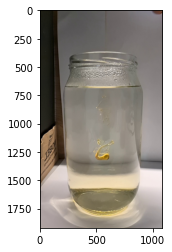

In [3]:
##### Let's see some shots from our dataset. #####
path = 'C:/Users/Asus/Desktop/A/B/Dataset/frame_313.jpg'
image=cv.imread(path)
#cv2.imshow('Sample pic', image)
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB)) 
plt.show



In [5]:
print(image.shape)   ##The shape of the picture 

(1920, 1080, 3)


(1920, 1080, 3)


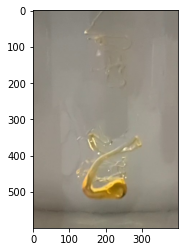

In [11]:
## Picture needs to be cropped in order to emphasize only the important part and to have a clean data. ##
crop_img = image[800:1400,350:750]
plt.imshow(cv.cvtColor(crop_img,cv.COLOR_RGB2BGR)) 
plt.show
print(image.shape)   ### shape won't change. 


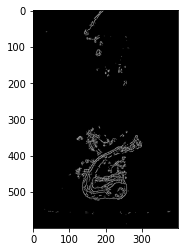

(600, 400)


In [12]:
### To extract only the important part we used edge detection with the given parameters below. ###
edges = cv.Canny(crop_img,50,50)
plt.imshow(cv.cvtColor(edges,cv.IMREAD_COLOR))
plt.show()
print(edges.shape)
### Notice the change in the shape. It will be much more easier to process now. Since it is not an RGB picture anymore. 

<function matplotlib.pyplot.show(close=None, block=None)>

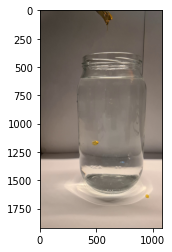

In [15]:
##### Let's see a random adulterated one #####
path = 'C:/Users/Asus/Desktop/A/B/sahte/database_sahte/adult_635.jpg'
image=cv.imread(path)
#cv2.imshow('Sample pic', image)
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB)) 
plt.show



(1920, 1080, 3)


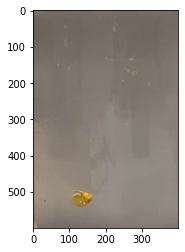

In [17]:
crop_img = image[650:1250,350:750]
plt.imshow(cv.cvtColor(crop_img,cv.COLOR_RGB2BGR)) 
plt.show
print(image.shape)   ### shape won't change. 


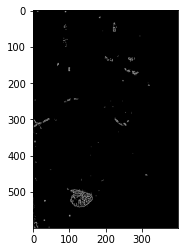

(600, 400)


In [18]:
### Edge detection of the adulterated honey. #####
edges = cv.Canny(crop_img,50,50)
plt.imshow(cv.cvtColor(edges,cv.IMREAD_COLOR))
plt.show()
print(edges.shape)

In [13]:
### Function for creating eligible and processed data for ML application. Basically function crops the frames based on parameters passed by user. 
### implements an edge detection. Also for further applications we also need to Label our data in order to feed the data into the ML. 
### In that context, real honey samples are labeled with '1' wheras adulterated ones are labeled as '0'.

def image_cropper(path,start_range,finish_range,h,w,x):
    data = []
    mylist = os.listdir(path)
    try:
        for img in range (start_range,finish_range):
            img_process = mylist[img]      
            img_path = path +'/'+ img_process
            img_array = cv.imread(img_path, cv.COLOR_RGB2BGR)
            crop_img = img_array[h:h+600,w:w+400]
            edges = cv.Canny(crop_img,50,50)
            label = np.array([x], dtype=np.uint16)
            data.append([label,edges])
    except Exception as e:
        pass
    data
    return data


In [19]:
###### PROPER DATA EXTRACTION FROM MEANINGFUL FRAMES ###########
pathfor_real = 'C:/Users/Asus/Desktop/A/B/Dataset'
pathfor_adulterated = 'C:/Users/Asus/Desktop/A/B/sahte/database_sahte'
###################################################################################################
part1_real = image_cropper(pathfor_real, 0   , 66  ,800  , 450 , 1)
part2_real = image_cropper(pathfor_real, 67  , 171 ,650  , 450 , 1)
part3_real = image_cropper(pathfor_real, 172 , 231 ,1100 , 350 , 1)
part4_real = image_cropper(pathfor_real, 232 , 308 ,750  , 520 , 1)
part5_real = image_cropper(pathfor_real, 309 , 317 ,1100 , 400 , 1)  
part6_real = image_cropper(pathfor_real, 318 , 370 ,975  , 475 , 1)   
part7_real = image_cropper(pathfor_real, 371 , 450 ,750  , 475 , 1)   
part8_real = image_cropper(pathfor_real, 451 , 554 ,975  , 400 , 1)   
part9_real = image_cropper(pathfor_real, 555 , 600 ,800  , 400 , 1)  
part10_real = image_cropper(pathfor_real,601 , 645 ,1000 , 400 , 1)  
###################################################################################################
part1_adul = image_cropper(pathfor_adulterated, 0   ,88  , 780 , 500 , 0)
part2_adul = image_cropper(pathfor_adulterated, 89  ,209 , 750 , 350 , 0)
part3_adul = image_cropper(pathfor_adulterated, 210 ,230 , 750 , 500 , 0)
part4_adul = image_cropper(pathfor_adulterated, 231 ,316 , 750 , 450 , 0)
part5_adul = image_cropper(pathfor_adulterated, 317 ,396 , 900 , 450 , 0)
part6_adul = image_cropper(pathfor_adulterated, 397 ,477 , 800 , 450 , 0)
part7_adul = image_cropper(pathfor_adulterated, 478 ,534 , 800 , 450 , 0)
part8_adul = image_cropper(pathfor_adulterated, 535 ,675 , 700 , 375 , 0)
part9_adul = image_cropper(pathfor_adulterated, 576 ,621 , 970 , 375 , 0)

In [20]:
## simply concatenating the lists we have extracted. 

data = part1_real + part1_adul + part2_real + part2_adul + part3_real + part3_adul + part4_real + part4_adul + part5_real + part5_adul + part6_real + part6_adul + part7_real + part7_adul + part8_real + part8_adul + part9_real + part9_adul + part10_real

In [21]:
X , y = [] , []
for label, feature in data:     ## creating the labels and feature set for the algorithm
    X.append(feature)           ## we are appending our label and features with the extracted data information. 
    y.append(label)



X = np.array(X).reshape(-1, 600, 400)  ## Here for processing the data We converted it into one dimensional array
X = X / 255.0                                    ## And normalized it. 

y = np.array(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) ## split the data 

In [23]:
X_train = X_train.reshape((-1, 600*400))  
X_test  = X_test.reshape((-1, 600*400)) 

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9922784509384652


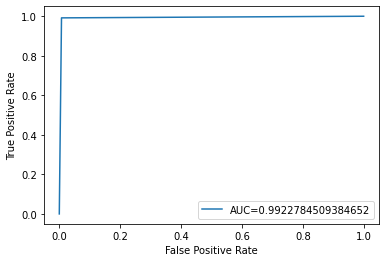

In [24]:
clf = MLPClassifier(solver='adam', activation='relu',hidden_layer_sizes=(64,64))
clf.fit(X_train,y_train)
clf_predict = clf.predict(X_test)

print(roc_auc_score(y_test,clf_predict))

false, true, _ = metrics.roc_curve(y_test, clf_predict)             ## For the mlp classifier here are the model fit and roc curve calculations.
auc = metrics.roc_auc_score(y_test, clf_predict)

plt.plot(false,true,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


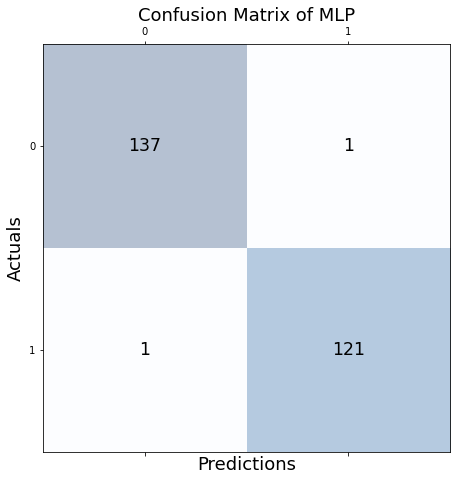

In [26]:
conf_matrix = confusion_matrix(y_test, clf_predict)


fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):                         ##Print confusion matrix.
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of MLP', fontsize=18)
plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9959016393442623


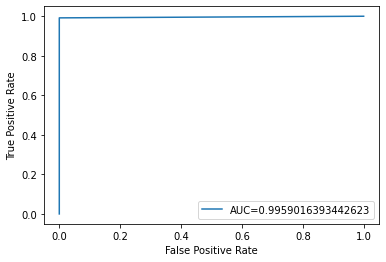

In [25]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
logistic_predict = log_model.predict(X_test)

print(roc_auc_score(y_test,logistic_predict))

fpr, tpr, _ = metrics.roc_curve(y_test, logistic_predict)           ##calculations for the logistic Regression
auc = metrics.roc_auc_score(y_test, logistic_predict)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


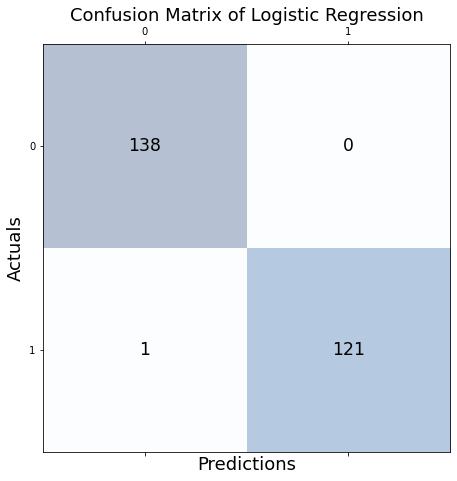

In [27]:
conf_matrix = confusion_matrix(y_test, logistic_predict)


fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')    ## Confusion matrix for logistic regression
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=18)
plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of Naive Bayes model is:0.9492753623188406


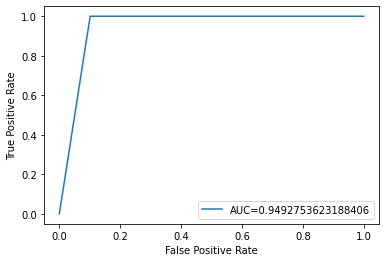

In [28]:

model_naive = GaussianNB()
model_naive.fit(X_train,y_train)
gauss_predict = model_naive.fit(X_train,y_train).predict(X_test)

print('Accuracy score of Naive Bayes model is:{}' .format(roc_auc_score(y_test,gauss_predict)))

fpr, tpr, _ = metrics.roc_curve(y_test, gauss_predict)
auc = metrics.roc_auc_score(y_test, gauss_predict)                  

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


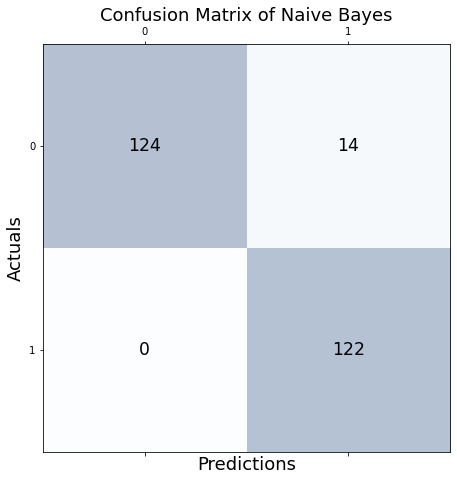

In [29]:
conf_matrix = confusion_matrix(y_test, gauss_predict)


fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Naive Bayes', fontsize=18)
plt.show()